In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = yf.download("BTC-USD")[['Close']]


[*********************100%***********************]  1 of 1 completed


In [4]:
data.index = pd.to_datetime(data.index)
data.head().round(2)

,Close
Date,
2014-09-17,457.33
2014-09-18,424.44
2014-09-19,394.80
2014-09-20,408.90
2014-09-21,398.82


In [5]:
data.shape

(2697, 1)

In [6]:
data.tail()

,Close
Date,
2022-01-30,37917.601562
2022-01-31,38483.125000
2022-02-01,38743.273438
2022-02-02,36952.984375
2022-02-03,36679.140625


Text(0.5, 1.0, 'Bitcoin price')

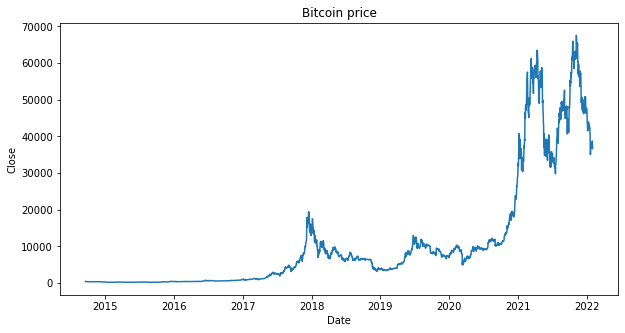

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(data.index, data.Close)
plt.title('Bitcoin price')

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.Close)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -1.33
5% Critical Value: -2.86
p-value: 0.61


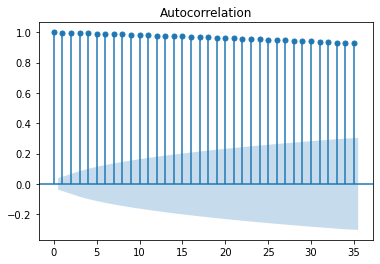

In [10]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(data.Close)
plt.show()

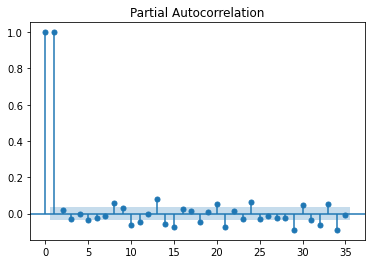

In [11]:
plot_pacf(data.Close)
plt.show()

In [13]:
data['differ'] = data['Close'].diff()
data.head()


,Close,differ
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,-32.894012
2014-09-19,394.795990,-29.644012
2014-09-20,408.903992,14.108002
2014-09-21,398.821014,-10.082977


Text(0.5, 1.0, 'Bitcoin price')

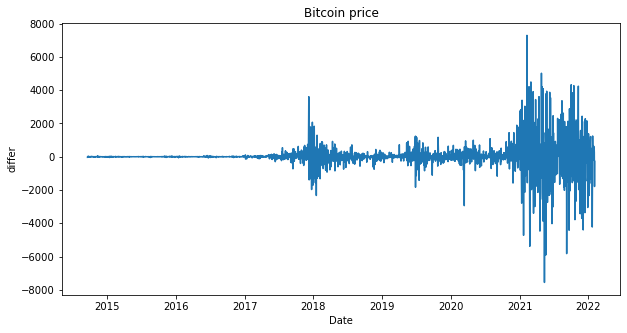

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(data.index, data.differ)
plt.title('Bitcoin price')

In [15]:
result = adfuller(data.differ.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -8.40
5% Critical Value: -2.86
p-value: 0.00


In [16]:
from statsmodels.tsa.arima_model import ARMA
mod_ar1 = ARMA(data.differ.dropna(), order=(1, 0))
res_ar1 = mod_ar1.fit()
print(res_ar1.summary())

C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2696
Model:                     ARMA(1, 0)   Log Likelihood              -21728.788
Method:                       css-mle   S.D. of innovations            765.631
Date:                Thu, 03 Feb 2022   AIC                          43463.576
Time:                        14:51:59   BIC                          43481.274
Sample:                    09-18-2014   HQIC                         43469.977
                         - 02-03-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.4354     14.371      0.935      0.350     -14.731      41.602
ar.L1.differ    -0.0261      0.019     -1.354      0.176      -0.064       0.012
                                    Roots   

In [49]:
from statsmodels.tsa.arima_model import ARIMA

p=range(5)
q=range(5)
d=range(5)
order_list = [(x,y,z) for x in p for y in q for z in d] 

In [18]:
mod_ar2 = ARMA(data.differ.dropna(), order=(10, 0))
res_ar2 = mod_ar2.fit()
print(res_ar2.summary())

C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2696
Model:                    ARMA(10, 0)   Log Likelihood              -21708.082
Method:                       css-mle   S.D. of innovations            759.757
Date:                Thu, 03 Feb 2022   AIC                          43440.163
Time:                        14:52:33   BIC                          43510.958
Sample:                    09-18-2014   HQIC                         43465.767
                         - 02-03-2022                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.4354     16.454      0.817      0.414     -18.814      45.685
ar.L1.differ     -0.0303      0.019     -1.576      0.115      -0.068       0.007
ar.L2.differ      0.0099      0.019     

In [19]:
mod_ma1 = ARMA(data.differ.dropna(), order=(0, 1))
res_ma1 = mod_ma1.fit()
print(res_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2696
Model:                     ARMA(0, 1)   Log Likelihood              -21728.795
Method:                       css-mle   S.D. of innovations            765.633
Date:                Thu, 03 Feb 2022   AIC                          43463.590
Time:                        14:52:36   BIC                          43481.289
Sample:                    09-18-2014   HQIC                         43469.991
                         - 02-03-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.4354     14.365      0.935      0.350     -14.719      41.589
ma.L1.differ    -0.0259      0.019     -1.349      0.177      -0.063       0.012
                                    Roots   

C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [20]:
mod_ma2 = ARMA(data.differ.dropna(), order=(0, 10))
res_ma2 = mod_ma2.fit()
print(res_ma2.summary())

C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2696
Model:                    ARMA(0, 10)   Log Likelihood              -21706.077
Method:                       css-mle   S.D. of innovations            759.187
Date:                Thu, 03 Feb 2022   AIC                          43436.154
Time:                        14:52:50   BIC                          43506.949
Sample:                    09-18-2014   HQIC                         43461.758
                         - 02-03-2022                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.4354     16.588      0.810      0.418     -19.076      45.947
ma.L1.differ     -0.0292      0.019     -1.522      0.128      -0.067       0.008
ma.L2.differ      0.0194      0.019     

In [21]:
train = data['differ'][0:int(len(data.differ)*0.8)]
test = data['differ'][int(len(data.differ)*0.8):]
print(len(train))
print(len(test))

2157
540


In [22]:
test.head()

Date
2020-08-13    199.203125
2020-08-14    -15.266602
2020-08-15     96.827148
2020-08-16     27.105469
2020-08-17    361.598633
Name: differ, dtype: float64

In [23]:
mod_ar1 = ARMA(train.dropna(), order=(1, 0))
res_ar1 = mod_ar1.fit()
print(res_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2156
Model:                     ARMA(1, 0)   Log Likelihood              -15247.858
Method:                       css-mle   S.D. of innovations            285.246
Date:                Thu, 03 Feb 2022   AIC                          30501.715
Time:                        14:53:56   BIC                          30518.743
Sample:                    09-18-2014   HQIC                         30507.944
                         - 08-12-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.1612      6.245      0.826      0.409      -7.078      17.401
ar.L1.differ     0.0163      0.022      0.756      0.449      -0.026       0.058
                                    Roots   

C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [24]:
predictions_ar1 = res_ar1.predict(test.index[0],test.index[-1])


In [25]:
from statsmodels.tools.eval_measures import rmse
rmse_ar1 = rmse(test,predictions_ar1)
rmse_ar1

1613.6915600004236

In [26]:
mod_ma1 = ARMA(train.dropna(), order=(0, 1))
res_ma1 = mod_ma1.fit()
print(res_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2156
Model:                     ARMA(0, 1)   Log Likelihood              -15247.853
Method:                       css-mle   S.D. of innovations            285.245
Date:                Thu, 03 Feb 2022   AIC                          30501.706
Time:                        14:54:15   BIC                          30518.734
Sample:                    09-18-2014   HQIC                         30507.934
                         - 08-12-2020                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.1612      6.245      0.826      0.409      -7.078      17.401
ma.L1.differ     0.0166      0.022      0.763      0.445      -0.026       0.059
                                    Roots   

C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [27]:
predictions_ma1 = res_ma1.predict(test.index[0],test.index[-1])
rmse_ma1 = rmse(test,predictions_ma1)
rmse_ma1

1613.691520364945

In [28]:
comparison_models = pd.DataFrame({'model': ['AR(1)','MA(1)'],'RMSE': [rmse_ar1, rmse_ma1], 'AIC': [res_ar1.aic, res_ma1.aic], 'BIC': [res_ar1.bic, res_ma1.bic]})
comparison_models

,model,RMSE,AIC,BIC
0,AR(1),1613.69156,30501.715331,30518.743361
1,MA(1),1613.69152,30501.705671,30518.733701


In [29]:
def optimize_ARMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in (order_list):
        try: 
            model = ARMA(exog, order=order).fit()
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic, model.bic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, q)', 'AIC', 'BIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [30]:
p = range(5)
q =range(5)
order_list = [(x,y) for x in p for y in q] 

In [31]:
result_arma = optimize_ARMA(order_list, data.differ.dropna())

C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information

In [32]:
result_arma


,"(p, q)",AIC,BIC
0,"(4, 4)",43424.897856,43483.893101
1,"(4, 2)",43433.910993,43481.107189
2,"(2, 4)",43434.426598,43481.622793
3,"(4, 3)",43436.149088,43489.244809
4,"(3, 4)",43437.357026,43490.452747
5,"(2, 2)",43442.814744,43478.211891
6,"(3, 3)",43445.868029,43493.064225
7,"(0, 4)",43462.052541,43497.449688
8,"(4, 0)",43463.067828,43498.464975
9,"(1, 2)",43463.113165,43492.610787


In [34]:
result_arma[result_arma.AIC == result_arma.AIC.min()]


,"(p, q)",AIC,BIC
0,"(4, 4)",43424.897856,43483.893101


In [39]:
test_prediction = pd.date_range("2022-02-02", periods=6, freq="D")
test_prediction


DatetimeIndex(['2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
               '2022-02-06', '2022-02-07'],
              dtype='datetime64[ns]', freq='D')

In [40]:
data.loc['2022-02-02 00:00:00', 'Close']


36952.984375

In [54]:
mod_arima224 = ARIMA(data.differ.dropna(), order=(2,2,4))
res_arima224 = mod_arima224.fit()
print(res_arima224.summary())


C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\oshav\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                             ARIMA Model Results                              
Dep. Variable:              D2.differ   No. Observations:                 2694
Model:                 ARIMA(2, 2, 4)   Log Likelihood              -21700.516
Method:                       css-mle   S.D. of innovations            757.005
Date:                Thu, 03 Feb 2022   AIC                          43417.033
Time:                        16:21:43   BIC                          43464.223
Sample:                    09-20-2014   HQIC                         43434.100
                         - 02-03-2022                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.645e-05        nan        nan        nan         nan         nan
ar.L1.D2.differ    -0.4812      0.004   -122.884      0.000      -0.489      -0.473
ar.L2.D2.differ    -0.9832      

In [55]:
predictions = res_arima224.predict(start='2022-02-02 00:00:00', end='2022-02-07 00:00:00')

In [56]:
def predictions_5(predictions):
	'''
	This function goes back to the price based on the values of diff predicted by the model
	'''
	result=[data.loc['2022-01-19 00:00:00', 'Close']]
	for i in range(1,6):
		result.append(result[-1]+predictions[i])
	return result

In [57]:
result = predictions_5(predictions)


In [58]:
result

[41744.328125,
 45210.57682186161,
 44471.93055887318,
 43370.18554156322,
 42983.65652174508,
 44252.90959679358]